In [1]:
# Common Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Data processing
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import StandardScaler

# Personal Machine Learning Model
from lib.tree import DecisionTreeClassifier

# Personal library for data manipulation
from lib.utils import load_data, split_train_test, get_error_rate

## Get the data

**This is a home-made function to load the data from the text file, a better version than that in the book; although in the real world, it is recommended to use pandas.read_csv or numpy.load_txt functions.**

In [2]:
X, y = load_data('datingTestSet.txt') 

**Check the shape to make sure the parsed data is good.**

In [3]:
X.shape, y.shape

((1000, 3), (1000,))

**As seen from the text file, the label datatype is string. It is recommended to convert it to nominal numbers**

In [4]:
y.dtype

dtype('<U10')

In [5]:
y[:10]

array(['largeDoses', 'smallDoses', 'didntLike', 'didntLike', 'didntLike',
       'didntLike', 'largeDoses', 'largeDoses', 'didntLike', 'largeDoses'],
      dtype='<U10')

**The conversion can easily be done by scikit-learn LabelEncoder transformer.**

In [6]:
encoder = LabelEncoder()
y = encoder.fit_transform(y) 
y[:10]

array([1, 2, 0, 0, 0, 0, 1, 1, 0, 1])

**Create new training and test data sets.**

In [7]:
X_train, y_train, X_test, y_test = split_train_test(X, y, ratio=0.2)

## visualize the data to gain insights

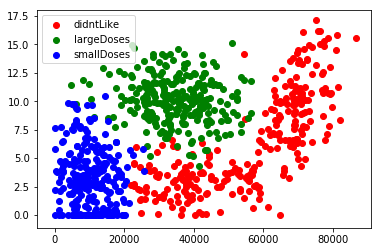

In [8]:
unique = list(set(y))
colors = ['red', 'green', 'blue']

fig, ax = plt.subplots()
for i in unique:
    x1 = X_train[y_train[:]==i, 0]
    x2 = X_train[y_train[:]==i, 1]
    ax.scatter(x1, x2, c=colors[i],
                label=encoder.inverse_transform(np.array([i]))[0])
    ax.legend()

**The feature for icecream comsumption does not have strong correlation with the result, so it is dropped**

In [9]:
X_train = X_train[:, [0, 1]]

## Prepare the data for machine learning algorithms 

**Feature Scaling--StandardScalar transformer**

In [10]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)

## Predict results with KNN algorithm

**"Train" the model (actually KNN is instance-based, and does not need to be trained)**

In [11]:
tree = DecisionTreeClassifier(metric='gini')
tree.fit(X_train, y_train)

In [12]:
y_predict = tree.predict(scale.transform(X_test[:, [0, 1]]))

In [13]:
y_predict

array([0., 0., 0., 2., 2., 1., 0., 2., 1., 0., 0., 2., 1., 0., 2., 2., 0.,
       1., 1., 1., 0., 0., 0., 2., 1., 1., 0., 2., 2., 1., 2., 2., 1., 0.,
       2., 0., 0., 0., 2., 1., 1., 2., 1., 2., 0., 0., 2., 1., 0., 1., 0.,
       1., 2., 0., 2., 2., 2., 0., 1., 1., 1., 0., 2., 2., 1., 2., 2., 1.,
       1., 0., 2., 0., 0., 0., 1., 0., 2., 1., 2., 1., 2., 1., 1., 2., 0.,
       1., 2., 2., 1., 2., 0., 0., 0., 2., 2., 1., 2., 0., 2., 0., 2., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 2., 1., 1., 0., 1., 2., 1.,
       0., 1., 0., 1., 0., 2., 2., 1., 2., 2., 0., 1., 2., 0., 0., 2., 2.,
       1., 1., 2., 1., 2., 2., 2., 0., 0., 2., 0., 0., 2., 0., 0., 2., 1.,
       2., 0., 1., 1., 2., 1., 2., 0., 1., 1., 2., 0., 0., 2., 2., 1., 0.,
       0., 2., 0., 2., 1., 2., 2., 2., 0., 2., 2., 0., 2., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.])

In [14]:
error_rate = get_error_rate(y_test, y_predict)
print("The error rate of this KNN model is {}".format(error_rate))

The error rate of this KNN model is 0.055


**Visualize the performance of KNN algorithm**

Note that one feature (the icecream comsumption) has been dropped, so the 2d plot is possible.

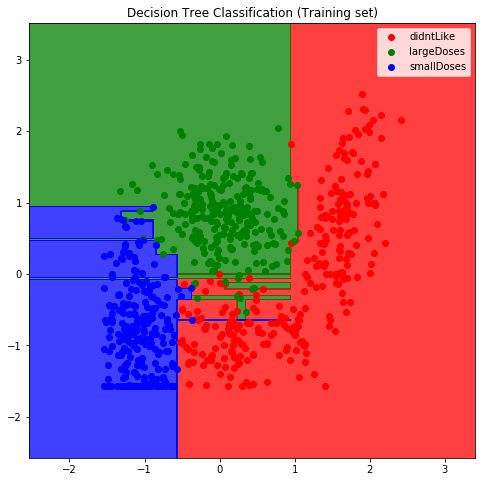

In [18]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
    np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01)
)
plt.figure(figsize=(8,8))
plt.contourf(
    X1,
    X2,
    tree.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(('red', 'green', 'blue'))                                                                                                                                          
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i in unique:
    X1 = X_set[y_set[:]==i, 0]
    X2 = X_set[y_set[:]==i, 1]
    plt.scatter(X1, X2, c=colors[i], label=encoder.inverse_transform(np.array([i]))[0])
    plt.legend()
plt.title('Decision Tree Classification (Training set)')
plt.legend()
plt.show() 

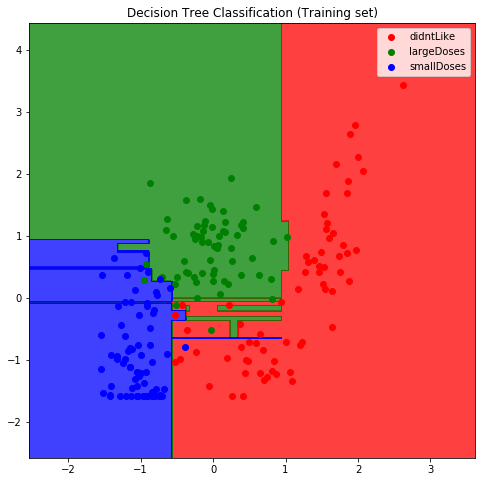

In [19]:
X_set, y_set = scale.transform(X_test[:, [0, 1]]), y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
    np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01)
)
plt.figure(figsize=(8,8))
plt.contourf(
    X1,
    X2,
    tree.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(('red', 'green', 'blue'))                                                                                                                                          
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i in unique:
    X1 = X_set[y_set[:]==i, 0]
    X2 = X_set[y_set[:]==i, 1]
    plt.scatter(X1, X2, c=colors[i], label=encoder.inverse_transform(np.array([i]))[0])
    plt.legend()
plt.title('Decision Tree Classification (Training set)')
plt.legend()
plt.show() 